# Loan Eligiblity Prediction using ML

##  Install all dependecies

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  
import numpy as np
import seaborn as sns
from sklearn import svm
from sklearn.metrics import accuracy_score


In [5]:
data = pd.read_csv(r"C:\Users\User\Desktop\study material\projects\datasets\loan eligiblity prediction using python\loan.csv")

In [6]:
data.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
data.shape

(614, 13)

In [14]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [21]:
data = data.dropna()

In [22]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [25]:
data.duplicated()

1      False
2      False
3      False
4      False
5      False
       ...  
609    False
610    False
611    False
612    False
613    False
Length: 480, dtype: bool

In [27]:
data.loc[:, "Loan_Status"].replace({"N": 0, "Y": 1}, inplace=True)


C:\Users\User\AppData\Local\Temp\ipykernel_15456\3315008182.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, "Loan_Status"].replace({"N": 0, "Y": 1}, inplace=True)


In [28]:
data.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1


In [29]:
data["Dependents"].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [30]:
data.loc[:, "Dependents"].replace({"3+": 4}, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_15456\1261098960.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, "Dependents"].replace({"3+": 4}, inplace=True)


In [32]:
data["Dependents"].value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

# Education vs Loan Status

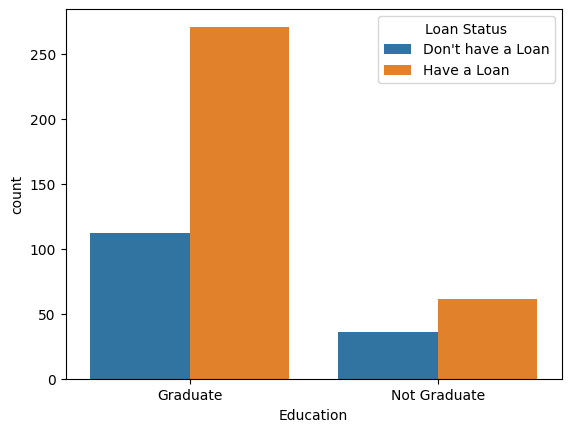

In [38]:
sns.countplot(x="Education", hue="Loan_Status", data=data)
plt.legend(title="Loan Status", labels=["Don't have a Loan", "Have a Loan"])
plt.show()

# Maritial Status vs Loan Status

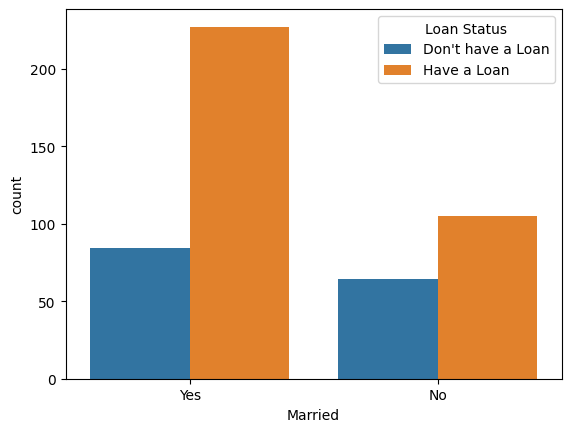

In [39]:
sns.countplot(x="Married", hue="Loan_Status", data=data)
plt.legend(title="Loan Status", labels=["Don't have a Loan", "Have a Loan"])
plt.show()

# Gender vs Loan Status

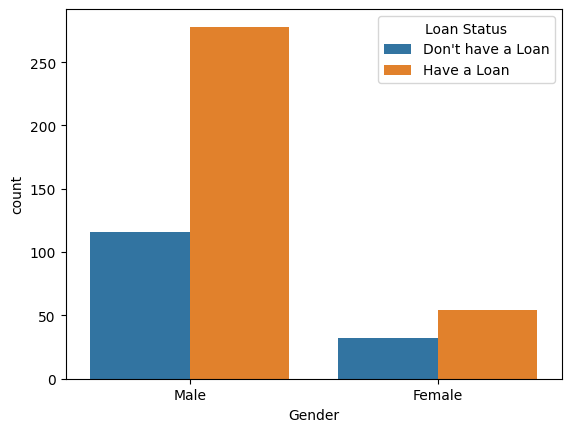

In [40]:
sns.countplot(x="Gender", hue="Loan_Status", data=data)
plt.legend(title="Loan Status", labels=["Don't have a Loan", "Have a Loan"])
plt.show()

In [56]:
data.replace({
    'Married': {'No': 0, 'Yes': 1},
    'Gender': {'Male': 1, 'Female': 0},
    'Self_Employed': {'No': 0, 'Yes': 1},
    'Property_Area': {'Rural': 0, 'Semiurban': 1, 'Urban': 2},
    'Education': {'Graduate': 1, 'Not Graduate': 0}
}, inplace=True)


C:\Users\User\AppData\Local\Temp\ipykernel_15456\1857907884.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.replace({


In [57]:
data.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1


In [58]:
X = data.drop(columns=["Loan_ID","Loan_Status"], axis=1)
Y=  data["Loan_Status"]

In [59]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

# Train Test Split

In [60]:
X_train , X_test , Y_train , y_test = train_test_split(X,Y,test_size=0.2, stratify=Y, random_state=2)

In [61]:
print(X.shape, X_train.shape , X_test.shape)

(480, 11) (384, 11) (96, 11)


## Training the model

In [62]:
classifier = svm.SVC(kernel="linear")


In [63]:
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [64]:
X_train_predicition = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_predicition, Y_train)

In [70]:
print("Accuracy of training data:",training_data_accuracy)

Accuracy of training data: 0.7786458333333334


In [67]:
X_test_predicition = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_predicition, y_test)

In [72]:
print("Accuracy of training data:",test_data_accuracy)

Accuracy of training data: 0.8125


## Accuracy of training data: 0.7786458333333334
## Accuracy of training data: 0.8125